1. Achar um banco de dados para ajudar (Pior que o que eu estou usando tem problema nenhum..)

#### Em conferindo/limpando:

- Fazer a leitura dos dados ( + versão para quando tem formatos malucos);
- Detectar os tipos das colunas;
- Alterar os tipo das colunas para ficar certo;
- Aqueles passos de retirada de colunas igual ao que eu fiz na Sicredi;
- Será que eu consigo detectar se alguma observação está com padrão diferente dos demais? por exemplo, uma letra em meio a números ou uma data específica com formatação diferente?

#### Nas análises:

- Fazer uma espécie de skim mais correto ou describe mais completo (Métricas, número nulos, distribuição);
- Olhar a correlação entre uma variável e as demais;
- Alguma forma de simplificar a junção de dados;

Acho que o mais importante é montar uma função única que receba os dois dataframes, e compare:
- o número de linhas;
- as colunas que estão diferentes (ás vezes até a ordem pode influenciar algo);
- os tipos das colunas que estão diferentes;
- quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
- tabela com a quantidade de nulos, mínimo, máximo, variância, número de categorias, período considerado pelas datas, porcentagem de linhas duplicadas e destacar o que estiver mais diferente;

In [ ]:
from skimpy import skim
skim(scr_teste)

In [ ]:
df.agg(*[f.sum(x).alias(f'sum_{x}') for x in clicks])

# Conferindo/Limpando dados com Pandas

In [1]:
import pandas as pd
import numpy as np

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("data/Credit.csv", sep=";", encoding="latin_1")
df["id"] = range(len(df))
chave_id = "id"
target_num = "IDADE"
target_cat = "CLASSE"
target_date = "date"

# 'ascii','big5','big5hkscs','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
# 'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
# 'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
# 'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
# 'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
# 'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
# 'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
# 'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig'

FileNotFoundError: [Errno 2] No such file or directory: 'data/Credit.csv'

In [3]:
df.dtypes

CHEQUEESPECIAL           object
USO_CREDITO               int64
HISTORICO_CREDITO        object
PROPOSITO                object
BALANCO_ATUAL             int64
BALANCO_MEDIO_CREDITO    object
EMPREGADO                object
LOCAL                     int64
ESTADOCIVIL              object
OUTRASFUNCOES            object
RESIDENCIADESDE           int64
TIPOSBENS                object
IDADE                     int64
OUTROSPLANOSPGTO         object
RESIDENCIA               object
CREDITOSEXISTENTES        int64
EMPREGO                  object
DEPENDENTES               int64
TRABAESTRANGEIRO         object
CLASSE                   object
id                        int32
dtype: object

In [8]:
# Confirma todos os tipos presentes nos dados!
df.dtypes.to_frame("type").reset_index().groupby("type").count()

,index
type,
int64,7
object,13


In [9]:
df = pd.DataFrame({"data1": ["2022-01-01", "2022-01-01", "2022-01-01"],
                   "data2": ["2022/01/01", "2022/01/01", "2022/01/01"],
                   "data3": ["01/01/2022", "01/01/2022", "01/01/2022"],
                   "num1": ["01", "2022", "02"],
                   "num2": ["0,1", "20,22", "0,2"],
                   "num3": ["0.1", "20.22", "0.2"]})
df

,data1,data2,data3,num1,num2,num3
0,2022-01-01,2022/01/01,01/01/2022,01,"0,1",0.1
1,2022-01-01,2022/01/01,01/01/2022,2022,"20,22",20.22
2,2022-01-01,2022/01/01,01/01/2022,02,"0,2",0.2


In [10]:
# Primeiro uma função que caso a coluna numérica/data esteja inicialmente como string seja corretamente tipada
# Posso separar as transformações por função, para dessa forma utilizar try catch e até mostrar se alguma coluna deu ruim
to_compare = pd.DataFrame({"columns_names": vendas_pd.columns, 
                           "initial_types": vendas_pd.dtypes, 
                           "initial_n_nulls": vendas_pd.isnull().sum()})

for column in vendas_pd.select_dtypes("object").columns:
    """ A loop to fix numeric ou date columns that were initiallly assigned as object columns. And shows already if the number 
        of nulls changed.
    """
    if sum(vendas_pd[column].str.contains("[a-zA-Z]").fillna(False)) == 0:
        if sum(vendas_pd[column].str.slice(1).str.contains("-").fillna(False)) + sum(vendas_pd[column].str.contains("/").fillna(False)) != 0:
            vendas_pd[column] = pd.to_datetime(vendas_pd[column])
        else:
            if sum(vendas_pd[column].str.contains(",").fillna(False)) != 0:
                vendas_pd[column] = vendas_pd[column].str.replace(",", ".")
            vendas_pd[column] = vendas_pd[column].astype("float")
            
to_compare["final_types"] = vendas_pd.dtypes
to_compare["final_n_nulls"] = vendas_pd.isnull().sum()
to_compare

,columns_names,initial_types,initial_n_nulls,final_types,final_n_nulls
data1,data1,object,0,datetime64[ns],0
data2,data2,object,0,datetime64[ns],0
data3,data3,object,0,datetime64[ns],0
num1,num1,object,0,float64,0
num2,num2,object,0,float64,0
num3,num3,object,0,float64,0


In [ ]:
# Existem outros conjuntos de tipos que geralmente devem ser trocados? Tipo inicialmente numérico que era para ser data.

In [13]:
# Esquema para a junção de dados

## printa a quantidade de linhas e colunas de ambos
## junta
## printa a quantidade de linhas e colunas de ambos
## printa a proporção de matches

In [25]:
df1 = df
df2 = df

print("Initial shape of the first Dataframe:")
print(df1.shape)
print("Initial shape of the second Dataframe:")
print(df2.shape)

df_merge = df1.merge(df2, how="left", on=chave_id, indicator=True)
display(df_merge["_merge"].value_counts(dropna=False, normalize=True))

chaves_df1 = df1.drop_duplicates(chave_id)[chave_id]
chaves_df2 = df2.drop_duplicates(chave_id)[chave_id]
print("Proportion of DF1 keys on DF2:")
print(sum(chave in chaves_df2 for chave in chaves_df1)/len(chaves_df1))
print("Proportion of DF2 keys on DF1:")
print(sum(chave in chaves_df1 for chave in chaves_df2)/len(chaves_df2))

print("-----------------------------------")
print("Final shape of the Dataframe:")
print(df_merge.shape)

Initial shape of the first Dataframe:
(1000, 22)
Initial shape of the second Dataframe:
(1000, 22)


both          1.0
left_only     0.0
right_only    0.0
Name: _merge, dtype: float64

Proportion of DF1 keys on DF2:
1.0
Proportion of DF2 keys on DF1:
1.0
-----------------------------------
Final shape of the Dataframe:
(1000, 44)


In [21]:
# Os passo a passo de conferência (Colunas com mais nulos, mais ou menos variância e etc...)

# Provavelmente já retiro os targets para modelos
dropped_cols = [chave_id, target_num, target_cat]

# Retirar o que tiver muito NULL

col_nulls_limit = 0.7

nulls_pct = df.isna().mean(axis=0)
exceeding = nulls_pct[nulls_pct >= col_nulls_limit]
dropped_cols.extend(exceeding.index.to_list())

# Retirar o que não tem variação

var_pct = df.select_dtypes(["int", "float64"]).var()
exceeding = var_pct[var_pct == 0]
dropped_cols.extend(exceeding.index.to_list())

var_pct = df.describe(include='object').loc["unique"]
exceeding = var_pct[var_pct <= 1]
dropped_cols.extend(exceeding.index.to_list())

# Retirar o que tiver só valores únicos

var_pct = df.describe(include='object').loc["unique"]
exceeding = var_pct[var_pct == df.shape[0]]
dropped_cols.extend(exceeding.index.to_list())

# Excluir as variáveis correlacionadas

corr_matrix = df.select_dtypes(["int", "float64"]).corr(method='spearman').abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
exceeding = [column for column in upper.columns if any(upper[column] > 0.85)]
dropped_cols.extend(exceeding)

# Mais uma feature selection...

# Finalização do retirando as colunas

risco_test = df[[chave_id, target_num, target_cat]]
df = df.drop(dropped_cols, axis = 1)

<ipython-input-21-4af2aa491b23>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [14]:
# Será que consigo destacar valores atípicos em cada variável:

# Nas variáveis numéricos, tem os outliers/percentis
# Será que algo como separador diferente dos demais?
# Nas categóricas/datas mostrar aquelas que tem só uma frequência

In [3]:
df["teste"] = np.repeat([",", ".", "-", "/"], 250, axis=0)

In [7]:
# Também comparar dois bancos de dados:

## o número de linhas;
## as colunas que estão diferentes (ás vezes até a ordem pode influenciar algo);
## os tipos das colunas que estão diferentes;
## quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
## tabela com a quantidade de nulos, mínimo, máximo, variância, número de categorias, período considerado pelas datas, 
## porcentagem de linhas duplicadas e destacar o que estiver mais diferente;

class CompareTwoDataframes:
    
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2
        
    def compare_shape(self):
        
        max_rows = "df1" if self.df1.shape[0] > self.df2.shape[0] else "df2"
        max_cols = "df1" if self.df1.shape[1] > self.df2.shape[1] else "df2"
        
        if (self.df1.shape == self.df2.shape):
            result = "Tha DataFrames have the same shape."
            
        elif ((self.df1.shape[0] != self.df2.shape[0]) & (self.df1.shape[1] != self.df2.shape[1])):
            result = f"{max_rows} has more rows and {max_cols} has more cols."
            
        elif (self.df1.shape[0] != self.df2.shape[0]):
            result = f"{max_rows} has more rows."
            
        elif (self.df1.shape[1] != self.df2.shape[1]):
            result = f"{max_cols} has more cols."
        
        print("Shape Comparing: " + result)
        return result
    
    def compare_cols_types(self):
        
        if any(self.df1.columns != self.df2.columns):
            result = "The dataframes columns have different order."
        else:
            if all(self.df1.dtypes == self.df2.dtypes):
                result = "The dataframes columns are exactly the same."
            else:
                cols_lists = self.df1.columns[self.df1.dtypes == self.df2.dtypes]
                result = f"The columns {cols_lists} have different types between the DataFrames."
        
        print("Columns Type Comparing: " + result)
        return result
    
    def detect_string_patterns(self):
        
        ## quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
        ## quem me dera deixar com menos linhas 
        df1_cols_with_letters = []
        df1_cols_with_numbers = []
        df1_cols_with_commas = []
        df1_cols_with_dots = []
        df1_cols_with_bars = []
        df1_cols_with_quotations = []
        
        for col in self.df1.columns:
            
            if any(self.df1[col].astype(str).str.contains("[:alpha:]")):
                df1_cols_with_letters.append(col)
            if any(self.df1[col].astype(str).str.contains("[:digit:]")):
                df1_cols_with_numbers.append(col)
            if any(self.df1[col].astype(str).str.contains(",")):
                df1_cols_with_commas.append(col)
            if any(self.df1[col].astype(str).str.contains("/.")):
                df1_cols_with_dots.append(col)
            if any(self.df1[col].astype(str).str.contains("//")):
                df1_cols_with_bars.append(col)
            if any(self.df1[col].astype(str).str.contains('"')):
                df1_cols_with_quotations.append(col)
                
        df2_cols_with_letters = []
        df2_cols_with_numbers = []
        df2_cols_with_commas = []
        df2_cols_with_dots = []
        df2_cols_with_bars = []
        df2_cols_with_quotations = []
        
        for col in self.df2.columns:
            
            if any(self.df2[col].astype(str).str.contains("[:alpha:]")):
                df2_cols_with_letters.append(col)
            if any(self.df2[col].astype(str).str.contains("[:digit:]")):
                df2_cols_with_numbers.append(col)
            if any(self.df2[col].astype(str).str.contains(",")):
                df2_cols_with_commas.append(col)
            if any(self.df2[col].astype(str).str.contains("/.")):
                df2_cols_with_dots.append(col)
            if any(self.df2[col].astype(str).str.contains("//")):
                df2_cols_with_bars.append(col)
            if any(self.df2[col].astype(str).str.contains('"')):
                df2_cols_with_quotations.append(col)
                
        print("Diference in Columns with letters: ")
        print(list(set(df1_cols_with_letters) - set(df2_cols_with_letters)))
        print("Diference in Columns with numbers: ")
        print(list(set(df1_cols_with_numbers) - set(df2_cols_with_numbers)))
        print("Diference in Columns with commas: ")
        print(list(set(df1_cols_with_commas) - set(df2_cols_with_commas)))
        print("Diference in Columns with dots: ")
        print(list(set(df1_cols_with_dots) - set(df2_cols_with_dots)))
        print("Diference in Columns with bars: ")
        print(list(set(df1_cols_with_bars) - set(df2_cols_with_bars)))
        print("Diference in Columns with quotations: ")
        print(list(set(df1_cols_with_quotations) - set(df2_cols_with_quotations)))
        
    def compare_metrics(self):
        
        # Compare numeric metrics
        numeric_comp = [(self.df1.describe()[col] == self.df2.describe()[col]).sum() != 8 for col in self.df1.describe().columns]
        if any(numeric_comp):
            print("Diference in Numeric Columns metrics: ")
            print(self.df1.describe().columns[numeric_comp])
        
        # Compare categoric metrics
        categoric_comp = [(self.df1.describe(include='object')[col] == self.df2.describe(include='object')[col]).sum() != 4 for col in self.df1.describe(include='object').columns]
        if any(numeric_comp):
            print("Diference in Categoric Columns metrics: ")
            print(self.df1.describe(include='object').columns[categoric_comp])
        
        # Compare proportion of null values
        nulls_comp = self.df1.isnull().sum() != self.df2.isnull().sum()
        if any(nulls_comp):
            print("Diference in Nulls Column: ")
            print(self.df1.columns[nulls_comp])
            
        # Compare proportion of duplicate values
        duplicate_comp = self.df1.drop_duplicates().shape[1] != self.df2.drop_duplicates().shape[1]
        if duplicate_comp:
            print("There is Diference in Duplicate Rows")
            
        if ((not all(numeric_comp)) & (not all(categoric_comp)) & (not all(nulls_comp)) & (not duplicate_comp)):
            print("All metrics are the same.")

#teste = CompareTwoDataframes(df, pd.concat([df, df], axis=1))
teste = CompareTwoDataframes(df, df)
teste.compare_shape()
teste.compare_cols_types()
teste.detect_string_patterns()
teste.compare_metrics()

Shape Comparing: Tha DataFrames have the same shape.
Columns Type Comparing: The dataframes columns are exactly the same.
Diference in Columns with letters: 
[]
Diference in Columns with numbers: 
[]
Diference in Columns with commas: 
[]
Diference in Columns with dots: 
[]
Diference in Columns with bars: 
[]
Diference in Columns with quotations: 
[]
All metrics are the same.


# Conferindo/Limpando dados com Pyspark

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.window import Window
# export PYSPARK_SUBMIT_ARGS="--master local[2] pyspark-shell"

# Estou tendo esse erro porque não tenho o java instalado, e meu notebook que nem Ubuntu tem... talvez seja
# melhor eu fazer isso usando o notebook do trabalho, viu...

spark = (SparkSession.builder
            .master('local[*]')
            .appName("Iniciando com Spark")
            .getOrCreate())

23/12/22 08:12:19 WARN Utils: Your hostname, Inspiron-7559 resolves to a loopback address: 127.0.1.1; using 192.168.100.14 instead (on interface enp4s0)
23/12/22 08:12:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/22 08:12:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
# Destacar também os encodins do Pyspark

In [2]:
import pandas as pd

url_github = 'https://raw.githubusercontent.com/lauraalexandria/cursos_python/main/data/Credit.csv'


pd_df = pd.read_csv(url_github, sep=";", encoding="latin_1")
spark_df = spark.createDataFrame(pd_df)
spark_df = spark_df.withColumn("id", f.row_number().over(Window().orderBy(f.lit('A'))))
# df["teste"] = np.repeat([",", ".", "-", "/"], 250, axis=0)

chave_id = "id"
target_num = "IDADE"
target_cat = "CLASSE"
target_date = "date"

# Encodings possíveis: ‘US-ASCII’, ‘ISO-8859-1’, ‘UTF-8’, ‘UTF-16BE’, ‘UTF-16LE’, ‘UTF-16’

spark_df.limit(5).toPandas()

23/12/22 08:12:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:12:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:12:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:12:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:12:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,...,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE,id
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,...,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom,1
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,...,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim,2
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,...,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom,3
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,...,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom,4
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,...,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim,5


In [3]:
spark_df.count()

1000

In [4]:
spark_df.printSchema()

root
 |-- CHEQUEESPECIAL: string (nullable = true)
 |-- USO_CREDITO: long (nullable = true)
 |-- HISTORICO_CREDITO: string (nullable = true)
 |-- PROPOSITO: string (nullable = true)
 |-- BALANCO_ATUAL: long (nullable = true)
 |-- BALANCO_MEDIO_CREDITO: string (nullable = true)
 |-- EMPREGADO: string (nullable = true)
 |-- LOCAL: long (nullable = true)
 |-- ESTADOCIVIL: string (nullable = true)
 |-- OUTRASFUNCOES: string (nullable = true)
 |-- RESIDENCIADESDE: long (nullable = true)
 |-- TIPOSBENS: string (nullable = true)
 |-- IDADE: long (nullable = true)
 |-- OUTROSPLANOSPGTO: string (nullable = true)
 |-- RESIDENCIA: string (nullable = true)
 |-- CREDITOSEXISTENTES: long (nullable = true)
 |-- EMPREGO: string (nullable = true)
 |-- DEPENDENTES: long (nullable = true)
 |-- TRABAESTRANGEIRO: string (nullable = true)
 |-- CLASSE: string (nullable = true)
 |-- id: integer (nullable = false)



In [5]:
df = spark.createDataFrame(
    [
        ("2022-01-01", "2022/01/01", "01/01/2022", "01", "0,1", "0.1"),  
        ("2022-01-01", "2022/01/01", "01/01/2022", "2022", "20,22", "20.22"), 
        ("2022-01-01", "2022/01/01", "01/01/2022", "02", "0,2", "0.2")
    ],
    ["data1", "data2", "data3", "num1", "num2", "num3"]
)
df.show()

+----------+----------+----------+----+-----+-----+
|     data1|     data2|     data3|num1| num2| num3|
+----------+----------+----------+----+-----+-----+
|2022-01-01|2022/01/01|01/01/2022|  01|  0,1|  0.1|
|2022-01-01|2022/01/01|01/01/2022|2022|20,22|20.22|
|2022-01-01|2022/01/01|01/01/2022|  02|  0,2|  0.2|
+----------+----------+----------+----+-----+-----+



In [ ]:
# Primeiro uma função que caso a coluna numérica/data esteja inicialmente como string seja corretamente tipada
# Posso separar as transformações por função, para dessa forma utilizar try catch e até mostrar se alguma coluna deu ruim
# Depois atualizar isso...
# to_compare = pd.DataFrame({"columns_names": [f.name for f in df.schema.fields], 
#                            "initial_types": [f.dataType for f in df.schema.fields], 
#                            "initial_n_nulls": df.isnull().sum()})
spark.createDataFrame(to_compare)
= spark.createDataFrame(
    [
        ("2022-01-01", "2022/01/01", "01/01/2022", "01", "0,1", "0.1"),  
        ("2022-01-01", "2022/01/01", "01/01/2022", "2022", "20,22", "20.22"), 
        ("2022-01-01", "2022/01/01", "01/01/2022", "02", "0,2", "0.2")
    ],
    ["columns_names", "initial_types", "initial_n_nulls"]
)                   "initial_n_nulls": df.isnull().sum()})

for column in [item[0] for item in df.dtypes if item[1].startswith('string')]:
    """ A loop to fix numeric ou date columns that were initiallly assigned as object columns. And shows already if the number 
        of nulls changed.
    """
    if df.filter(f.col(column).rlike("[:alpha:]")).count() == 0:
        if df.filter(f.col(column).contains("-")).count() != 0:
            df = df.withColumn(column, f.to_date(f.col(column)))
        elif df.filter(f.col(column).contains("/")).count() != 0:
            df = df.withColumn(column, f.to_date(f.regexp_replace(f.col(column), "/", "-"))) # Ainda tenho que consertar para outros formatos...
        else:
            if df.filter(f.col(column).contains(",")).count() != 0:
                df = df.withColumn(column, f.regexp_replace(f.col(column), ",", "."))
            df = df.withColumn(column, f.col(column).cast("double"))
            
# to_compare["final_types"] = df.dtypes
# to_compare["final_n_nulls"] = df.isnull().sum()
# to_compare

In [ ]:
# Esquema para a junção de dados

## printa a quantidade de linhas e colunas de ambos
## junta
## printa a quantidade de linhas e colunas de ambos
## printa a proporção de matches

In [6]:
df1 = spark_df
df2 = spark_df

print("Initial shape of the first Dataframe:")
print(df1.count())
print("Initial shape of the second Dataframe:")
print(df2.count())

df_merge = df1.join(df2, how="left", on=chave_id)
#display(df_merge["_merge"].value_counts(dropna=False, normalize=True))

chaves_df1 = df1.dropDuplicates([chave_id]).toPandas()[chave_id]
chaves_df2 = df2.dropDuplicates([chave_id]).toPandas()[chave_id]
print("Proportion of DF1 keys on DF2:")
print(sum(chave in chaves_df2 for chave in chaves_df1)/len(chaves_df1))
print("Proportion of DF2 keys on DF1:")
print(sum(chave in chaves_df1 for chave in chaves_df2)/len(chaves_df2))

print("-----------------------------------")
print("Final shape of the Dataframe:")
print(df_merge.count())

Initial shape of the first Dataframe:
1000
Initial shape of the second Dataframe:
1000
23/11/02 16:22:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/11/02 16:22:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


23/11/02 16:22:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
Proportion of DF1 keys on DF2:
0.999
Proportion of DF2 keys on DF1:
0.999
-----------------------------------
Final shape of the Dataframe:
23/11/02 16:22:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:22:42 WARN WindowExec: 

In [ ]:
# Acho que não é necessário fazer a parte de exclusão de colunas com o pyspark, porque pe mais importante para o Pandas

In [26]:
# AINDA NÃO FIZ TESTE COM VERSÕES ERRADAS!

23/11/02 16:38:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:38:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:38:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:38:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:38:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 16:38:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 1

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [39]:
# pelo visto o numérico e o nulo estão com os mesmo problema ainda!!

[]

In [36]:
# Também comparar dois bancos de dados:

## o número de linhas;
## as colunas que estão diferentes (ás vezes até a ordem pode influenciar algo);
## os tipos das colunas que estão diferentes;
## quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
## tabela com a quantidade de nulos, mínimo, máximo, variância, número de categorias, período considerado pelas datas, 
## porcentagem de linhas duplicadas e destacar o que estiver mais diferente;

from itertools import compress

class CompareTwoDataframes:
    
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2
        
    def compare_shape(self):
        
        max_rows = "df1" if self.df1.count() > self.df2.count() else "df2"
        max_cols = "df1" if len(self.df1.columns) > len(self.df2.columns) else "df2"
        
        if ((self.df1.count() == self.df2.count()) & (len(self.df1.columns) == len(self.df2.columns))):
            result = "Tha DataFrames have the same shape."
            
        elif ((self.df1.count() != self.df2.count()) & (len(self.df1.columns) != len(self.df2.columns))):
            result = f"{max_rows} has more rows and {max_cols} has more cols."
            
        elif (self.df1.count() != self.df2.count()):
            result = f"{max_rows} has more rows."
            
        elif (len(self.df1.columns) != len(self.df2.columns)):
            result = f"{max_cols} has more cols."
        
        print("Shape Comparing: " + result)
        return result
    
    def compare_cols_types(self):
        
        df1_types = [f.dataType for f in self.df1.schema.fields]
        df2_types = [f.dataType for f in self.df2.schema.fields]
        
        if self.df1.columns != self.df2.columns:
            result = "The dataframes columns have different order."
        else:
            if df1_types == df2_types:
                result = "The dataframes columns are exactly the same."
            else:
                cols_lists = self.df1.columns[self.df1.dtypes == self.df2.dtypes]
                result = f"The columns {cols_lists} have different types between the DataFrames."
        
        print("Columns Type Comparing: " + result)
        return result
    
    # CONTINUA AQUI!
    
    def detect_string_patterns(self):
        
        ## quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
        ## quem me dera deixar com menos linhas 
        df1_cols_with_letters = [s for s in self.df1.columns if '[:alpha:]' in s]
        df1_cols_with_numbers = [s for s in self.df1.columns if '[:digit:]' in s]
        df1_cols_with_commas = [s for s in self.df1.columns if ',' in s]
        df1_cols_with_dots = [s for s in self.df1.columns if '/.' in s]
        df1_cols_with_bars = [s for s in self.df1.columns if '//' in s]
        df1_cols_with_quotations = [s for s in self.df1.columns if '"' in s]
                
        df2_cols_with_letters = [s for s in self.df2.columns if '[:alpha:]' in s]
        df2_cols_with_numbers = [s for s in self.df2.columns if '[:digit:]' in s]
        df2_cols_with_commas = [s for s in self.df2.columns if ',' in s]
        df2_cols_with_dots = [s for s in self.df2.columns if '/.' in s]
        df2_cols_with_bars = [s for s in self.df2.columns if '//' in s]
        df2_cols_with_quotations = [s for s in self.df2.columns if '"' in s]
                
        print("Diference in Columns with letters: ")
        print(list(set(df1_cols_with_letters) - set(df2_cols_with_letters)))
        print("Diference in Columns with numbers: ")
        print(list(set(df1_cols_with_numbers) - set(df2_cols_with_numbers)))
        print("Diference in Columns with commas: ")
        print(list(set(df1_cols_with_commas) - set(df2_cols_with_commas)))
        print("Diference in Columns with dots: ")
        print(list(set(df1_cols_with_dots) - set(df2_cols_with_dots)))
        print("Diference in Columns with bars: ")
        print(list(set(df1_cols_with_bars) - set(df2_cols_with_bars)))
        print("Diference in Columns with quotations: ")
        print(list(set(df1_cols_with_quotations) - set(df2_cols_with_quotations)))
        
    def compare_metrics(self):
        
        # Existe um describe que mostra o count, mean, stddev, min e max tanto para os numéricos quanto para os categóricos
        # também temos um coluna para cada coluna, mas fiquei em dúvida como funcionaria para cada for
        
        # Compare numeric metrics
        numeric_comp = [self.df1.describe().select(col).collect() != self.df2.describe().select(col).collect() for col in self.df1.describe().columns]
        if any(numeric_comp):
            print("Diference in Numeric Columns metrics: ")
            print(list(compress(self.df1.describe().columns, numeric_comp)))
        
        # Compare categoric metrics
        cat_cols = [c for c, t in self.df1.dtypes if t.startswith('string')]
        categoric_comp = [self.df1.agg(f.collect_set(col).alias('categories')).collect()[0] != self.df2.agg(f.collect_set(col).alias('categories')).collect()[0] for col in cat_cols]
        if any(categoric_comp):
            print("Diference in Categoric Columns metrics: ")
            print(list(compress(self.df1.describe(include='object').columns , categoric_comp)))
        
        # Compare proportion of null values
        # Lembrando que se as colunas não estiverem na ordem certa, não vai funcionar
        nulls_comp = [self.df1.describe().select(col).collect()[0] != self.df2.describe().select(col).collect()[0] for col in self.df1.describe().columns]
        if any(nulls_comp):
            print("Diference in Nulls Column: ")
            print(list(compress(self.df1.describe().columns, nulls_comp)))
            
        # Compare proportion of duplicate values
        duplicate_comp = self.df1.dropDuplicates().count() != self.df2.dropDuplicates().count()
        if duplicate_comp:
            print("There is Diference in Duplicate Rows")
            
        if ((not all(numeric_comp)) & (not all(categoric_comp)) & (not all(nulls_comp)) & (not duplicate_comp)):
            print("All metrics are the same.")

#teste = CompareTwoDataframes(df, pd.concat([df, df], axis=1))
teste = CompareTwoDataframes(spark_df, spark_df)
teste.compare_shape()
teste.compare_cols_types()
teste.detect_string_patterns()
teste.compare_metrics()

Shape Comparing: Tha DataFrames have the same shape.
Columns Type Comparing: The dataframes columns are exactly the same.
Diference in Columns with letters: 
[]
Diference in Columns with numbers: 
[]
Diference in Columns with commas: 
[]
Diference in Columns with dots: 
[]
Diference in Columns with bars: 
[]
Diference in Columns with quotations: 
[]


23/12/22 08:55:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:55:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:55:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:55:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:56:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:56:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 0

All metrics are the same.


23/12/22 08:56:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/22 08:56:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


# Análises utilizando Pandas+Seaborn(?)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("data/Credit.csv", sep=";", encoding="latin_1")
df["id"] = range(len(df))
df["date"] = pd.to_datetime(
    np.random.choice(["2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01",
                      "2023-07-01", "2023-08-01", "2023-09-01", "2023-10-01", "2023-11-01", "2023-12-01"],
                      size=df.shape[0], replace=True)
    )

chave_id = "id"
target_num = "IDADE"
target_cat = "CLASSE"
target_date = "date"
df.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE,id,date
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom,0,2023-03-01
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim,1,2023-09-01
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom,2,2023-12-01
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom,3,2023-05-01
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim,4,2023-10-01


In [4]:
df.describe()

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES,id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,499.500000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,288.819436
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,249.750000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,499.500000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,749.250000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,999.000000


In [5]:
df.select_dtypes("object").describe()

,CHEQUEESPECIAL,HISTORICO_CREDITO,PROPOSITO,BALANCO_MEDIO_CREDITO,EMPREGADO,ESTADOCIVIL,OUTRASFUNCOES,TIPOSBENS,OUTROSPLANOSPGTO,RESIDENCIA,EMPREGO,TRABAESTRANGEIRO,CLASSE,date
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,12
top,sem cheque,existente e pago,Computador/TV,<100,1<=X<4,masculino solteiro,nenhum,carro,nenhum,própria,especializado,sim,bom,2023-03-01
freq,394,530,280,603,339,548,907,332,814,713,630,963,700,103


In [11]:
df.select_dtypes("datetime").describe()

<ipython-input-11-874f9066af36>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.select_dtypes("datetime").describe()


,date
count,1000
unique,12
top,2023-05-01 00:00:00
freq,94
first,2023-01-01 00:00:00
last,2023-12-01 00:00:00


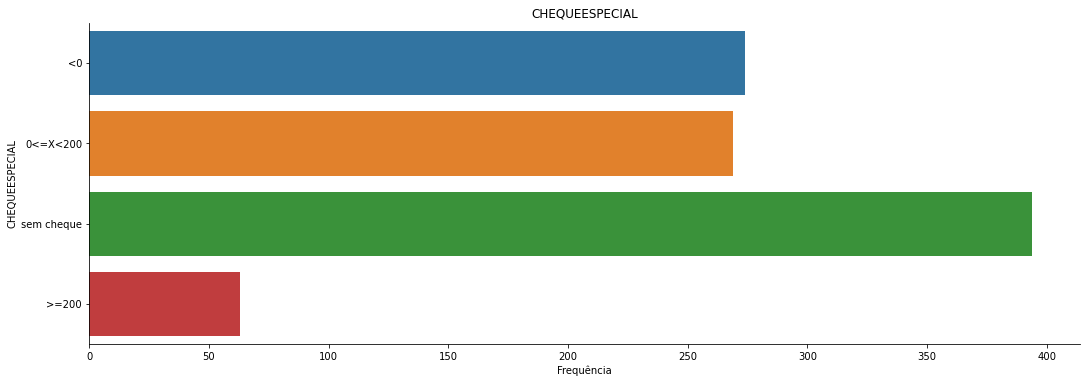

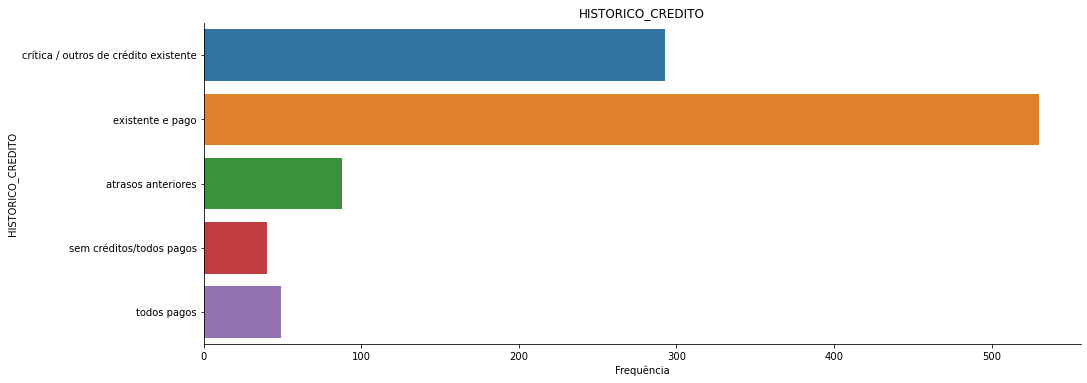

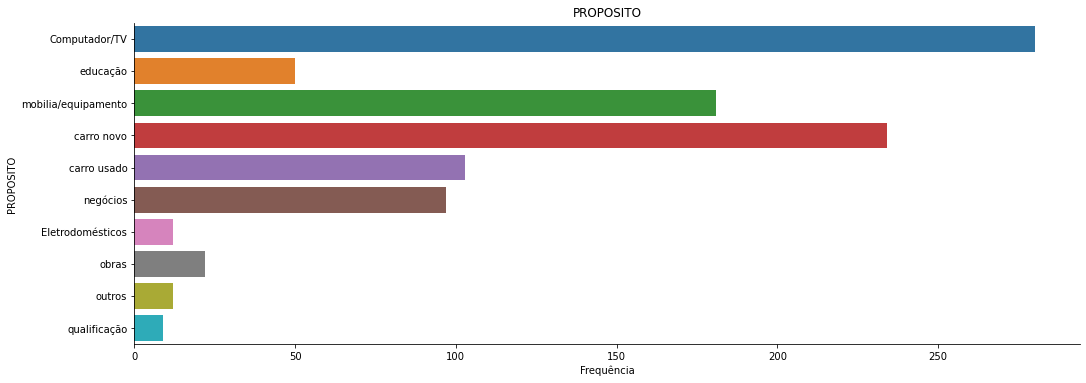

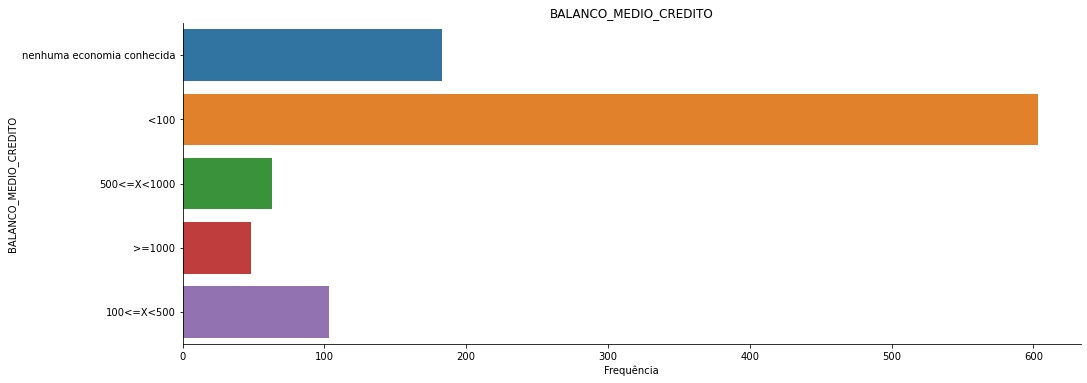

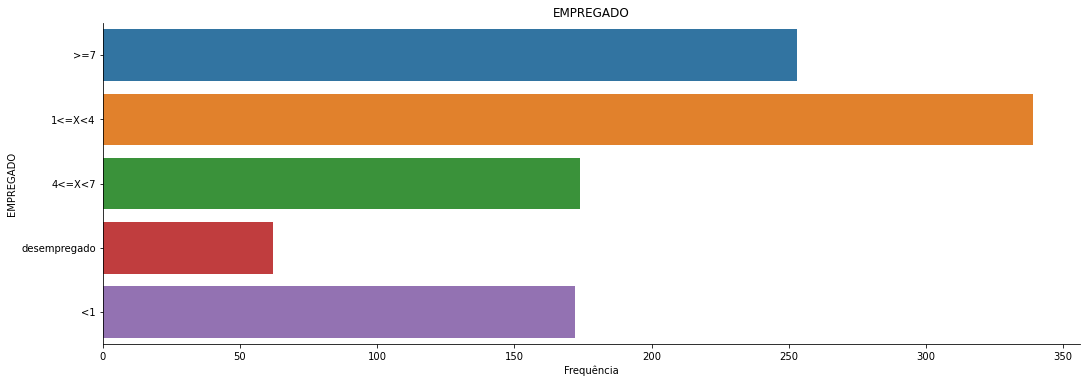

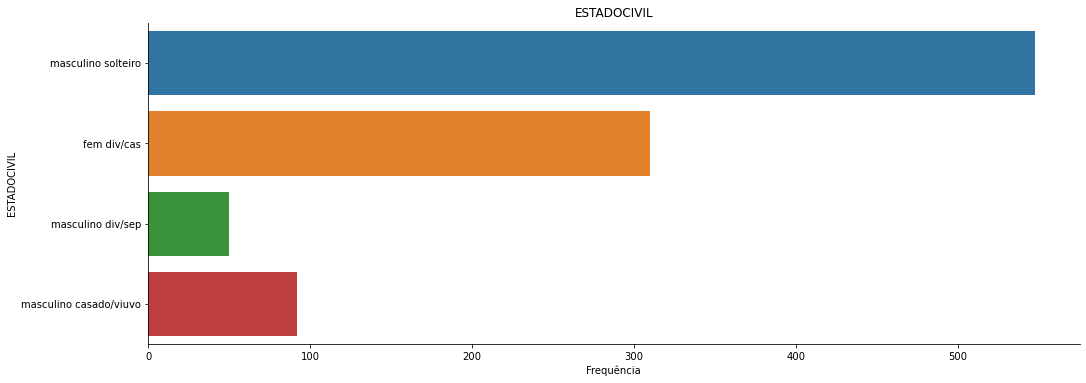

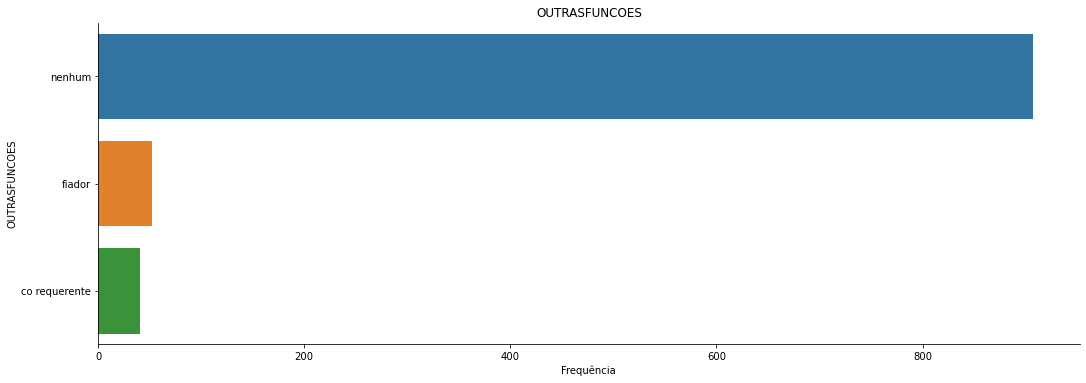

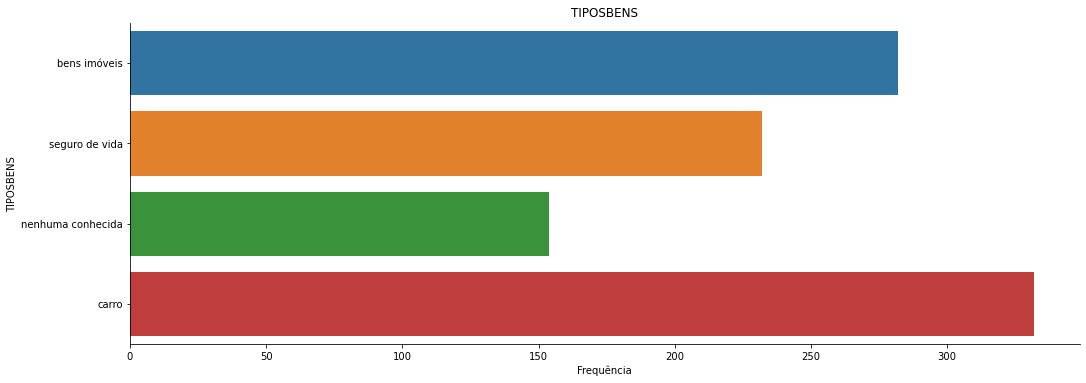

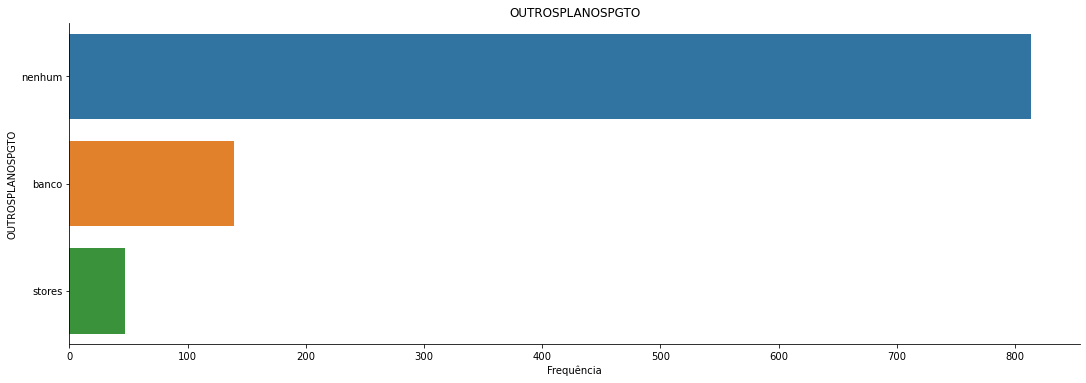

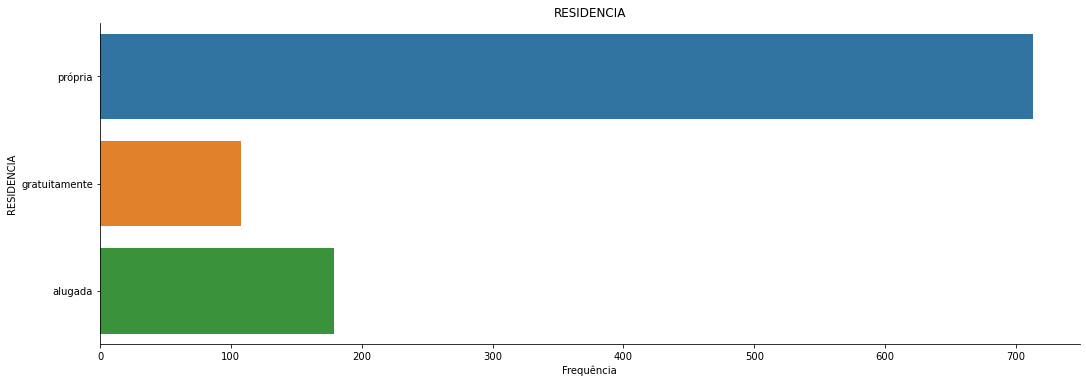

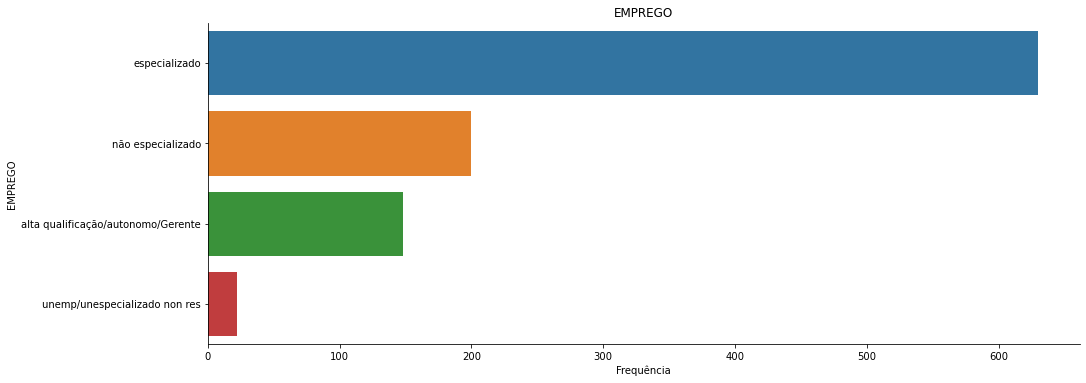

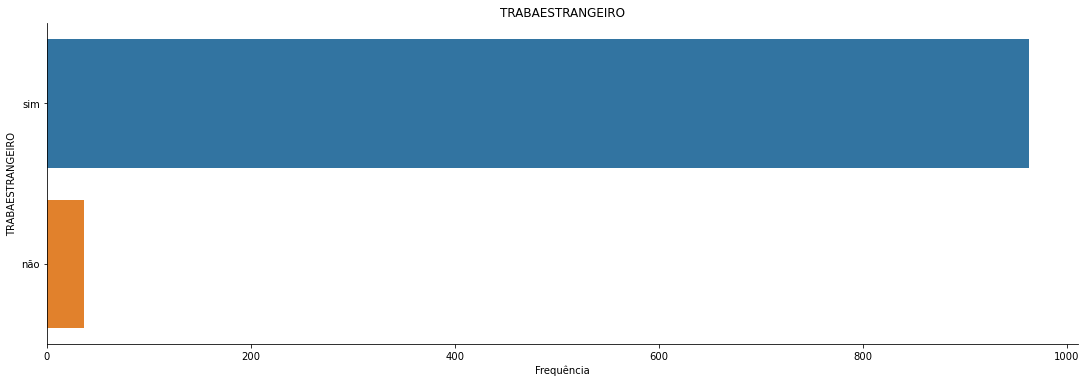

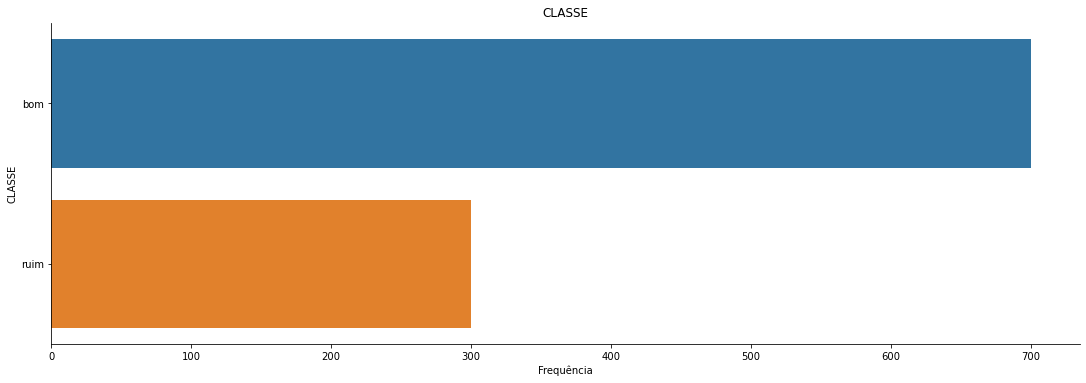

In [9]:
# Gráficos de Barras para as Categóricas

def plot_count_cat_cols(df, cat_cols):
    for col in cat_cols:
        df.value_counts(col).sort_values().to_frame().plot.barh(figsize=(12, 5))
        #sns.catplot(data=df_count, y=col, x="count", kind="count", height=5, aspect=3)
        plt.title(f"{col}")
        plt.xlabel("Frequência")
        plt.show()
        
plot_count_cat_cols(df, cols)

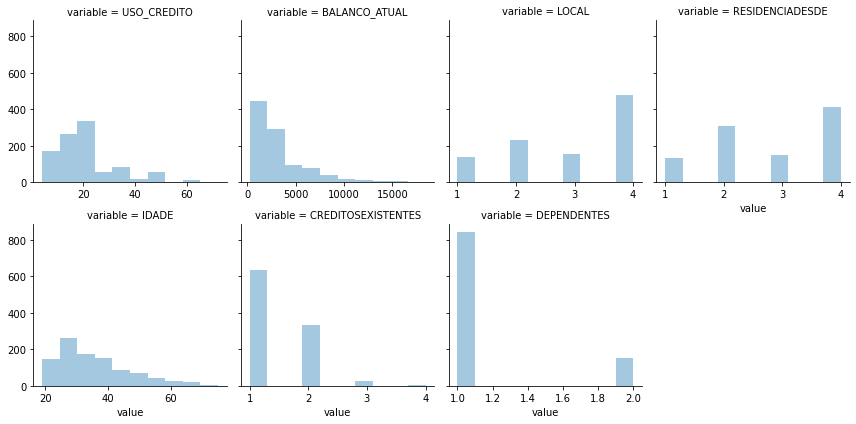

In [16]:
# Histogramas para as Numéricas

df_melt_num = df.melt(id_vars=[chave_id], value_vars=df.select_dtypes(["float64", "int64"]))
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, sharex=False)
g.map(plt.hist, "value", alpha=.4)

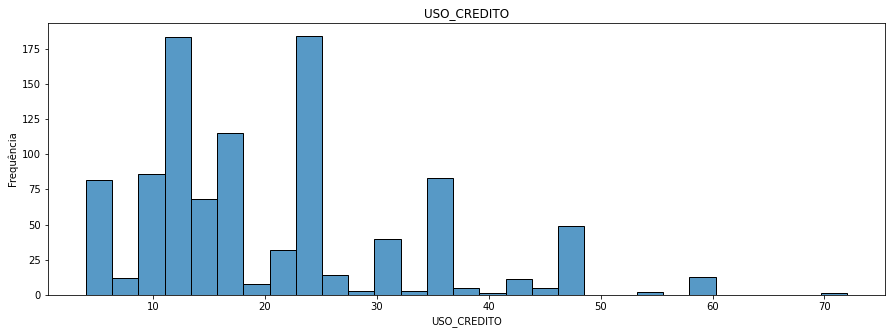

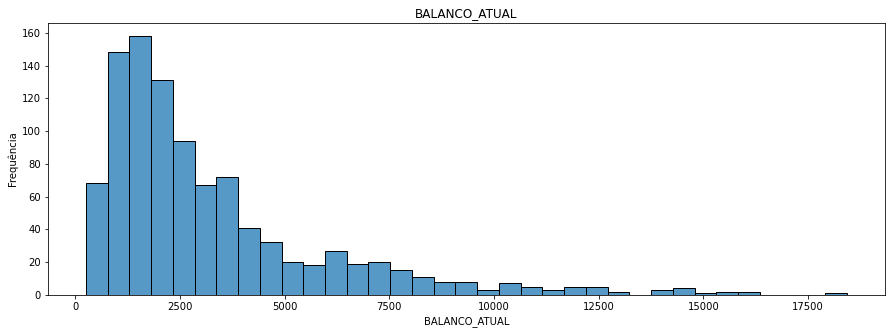

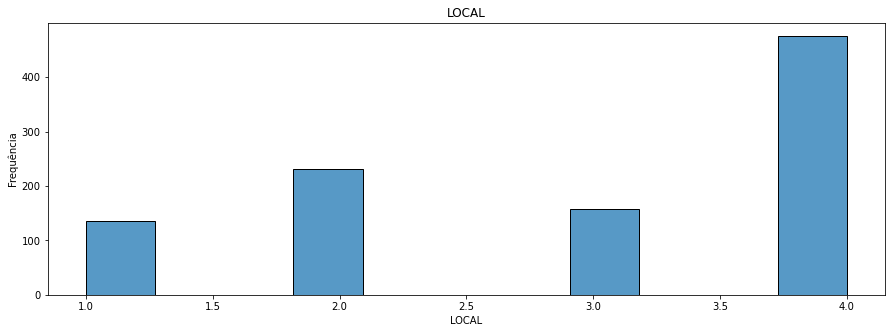

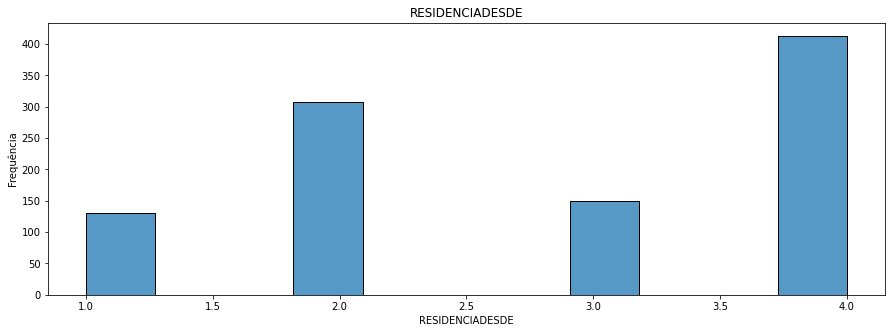

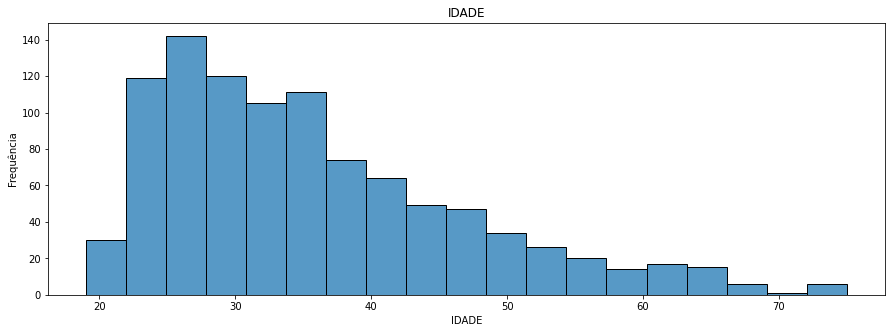

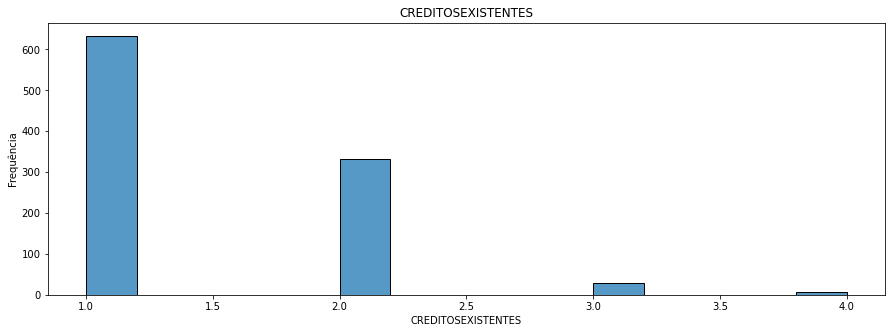

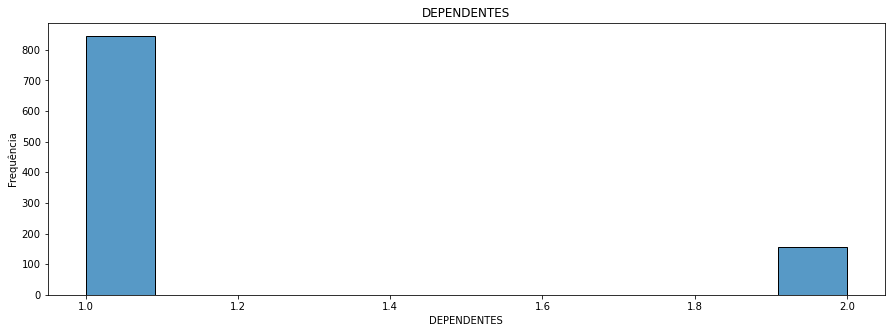

In [15]:
# Histogramas para as Numéricas - Versão 2

def plot_dist_num_cols(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(15,5))
        sns.histplot(data=df, x=col)
        plt.title(f"{col}")
        plt.ylabel("Frequência")
        plt.show()
        
plot_dist_num_cols(df, df.select_dtypes(["float64", "int64"]).columns)

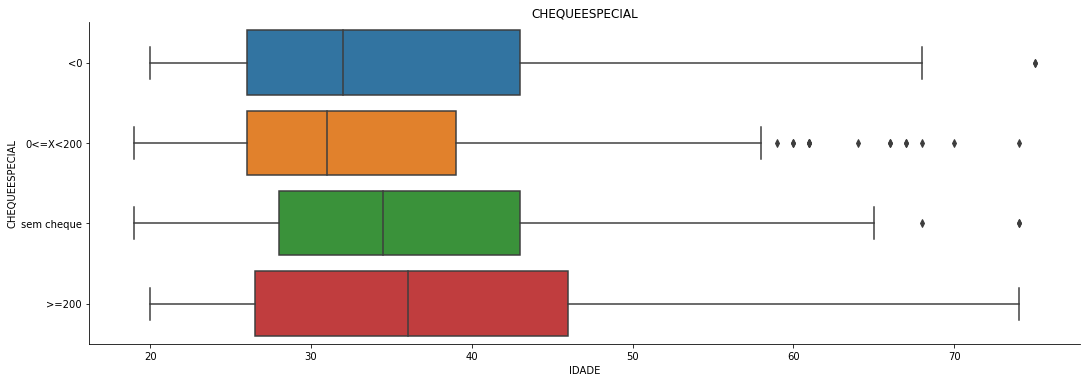

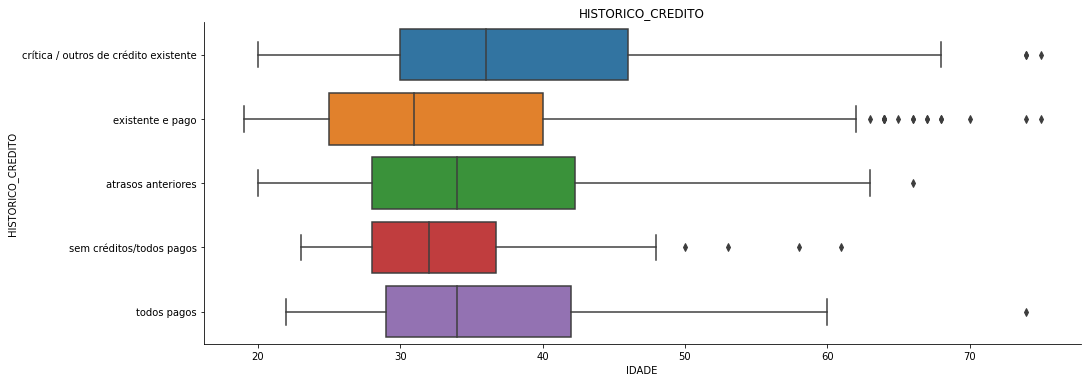

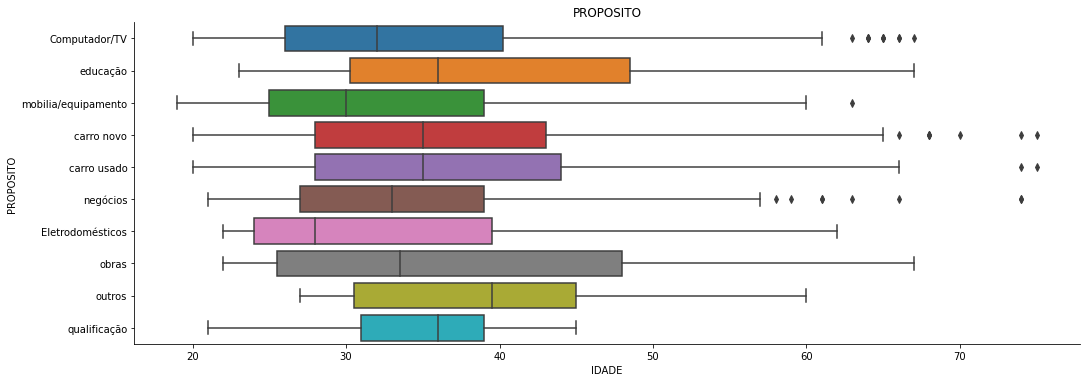

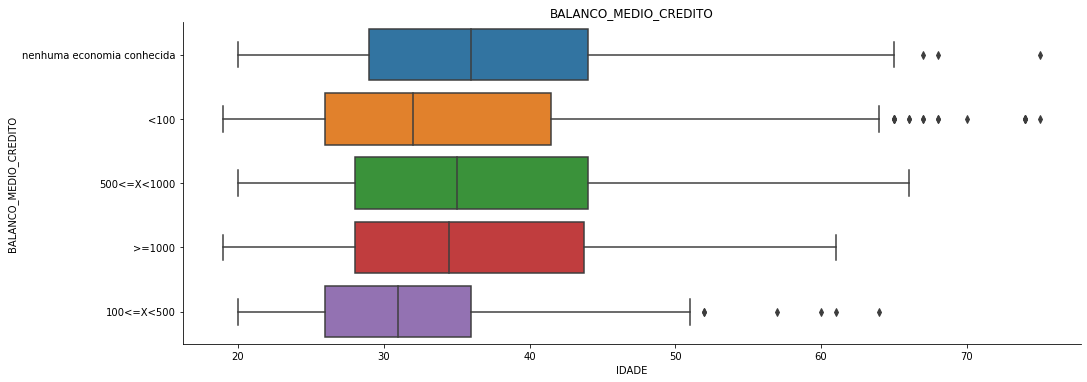

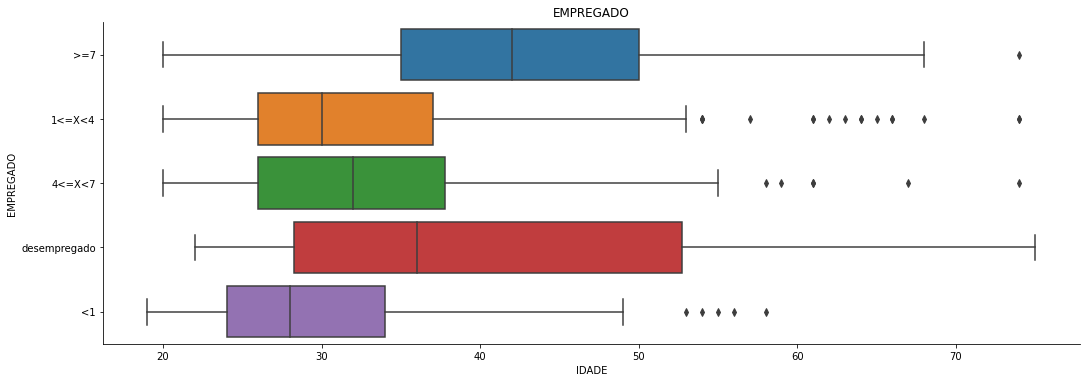

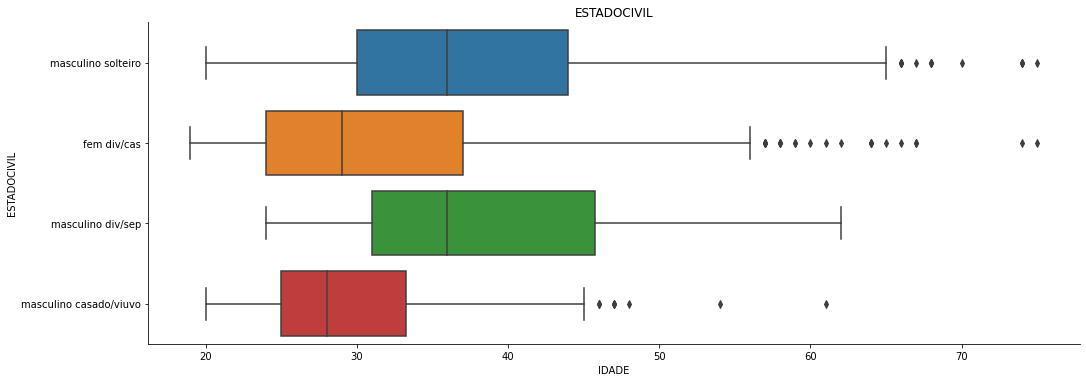

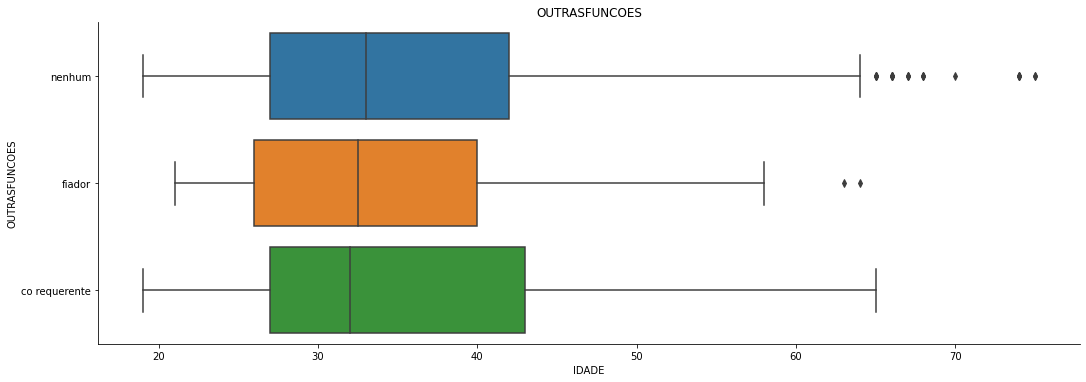

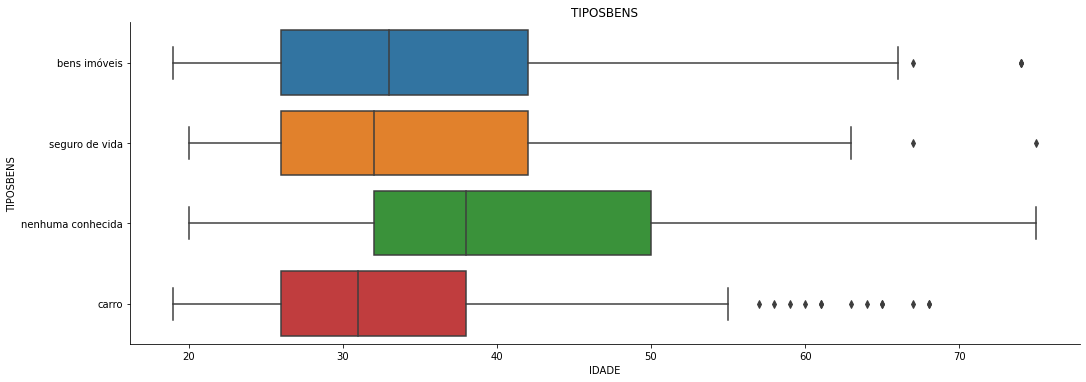

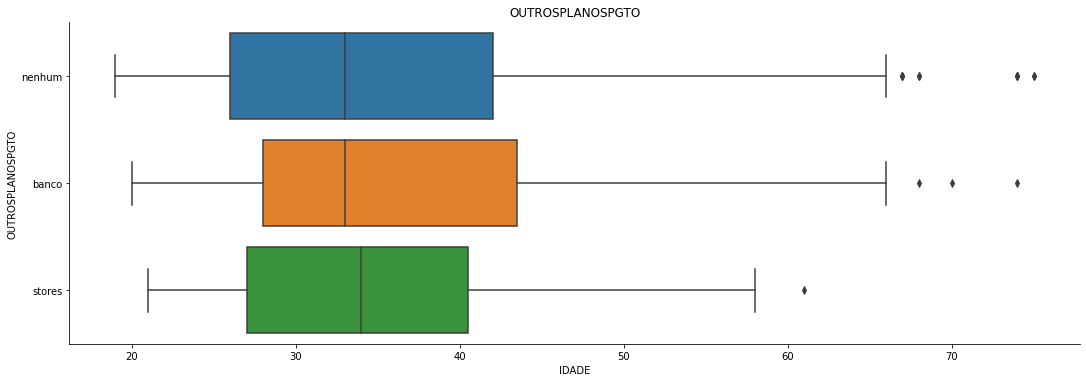

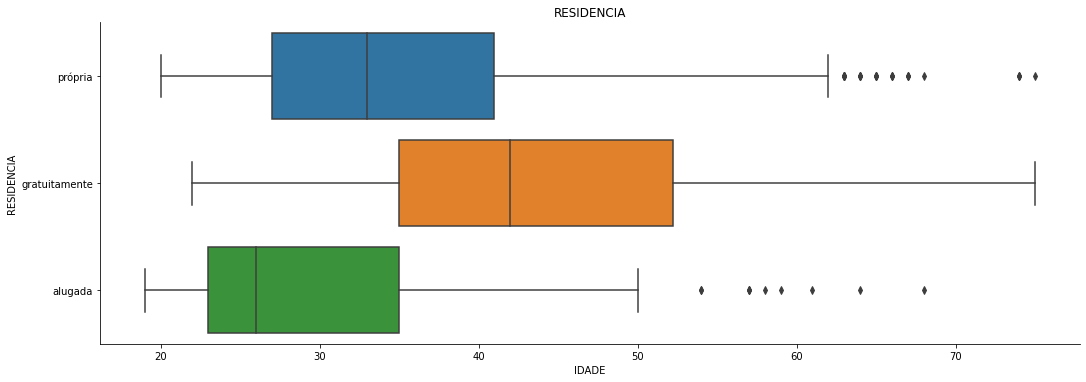

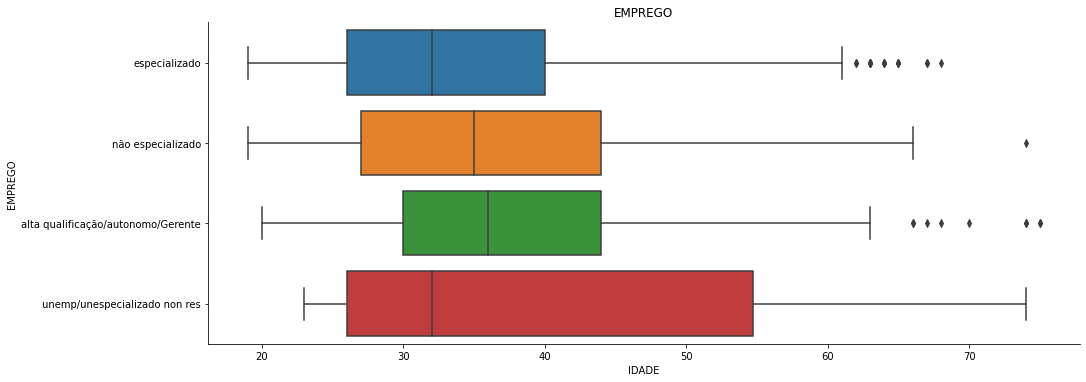

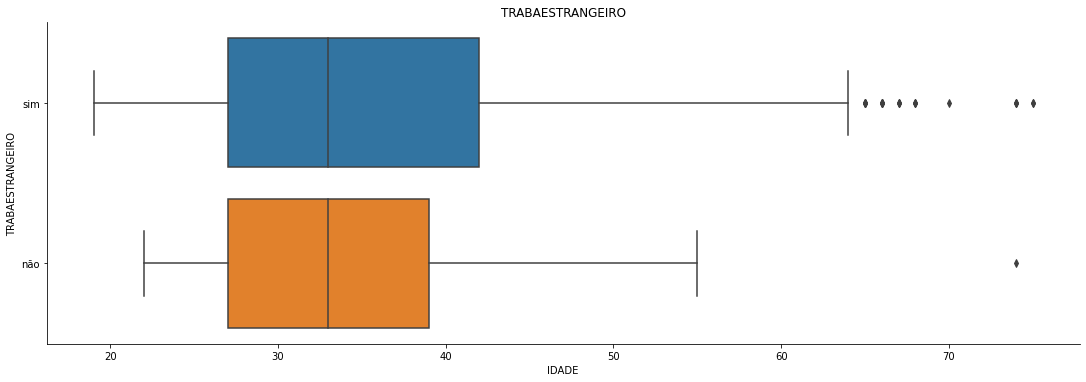

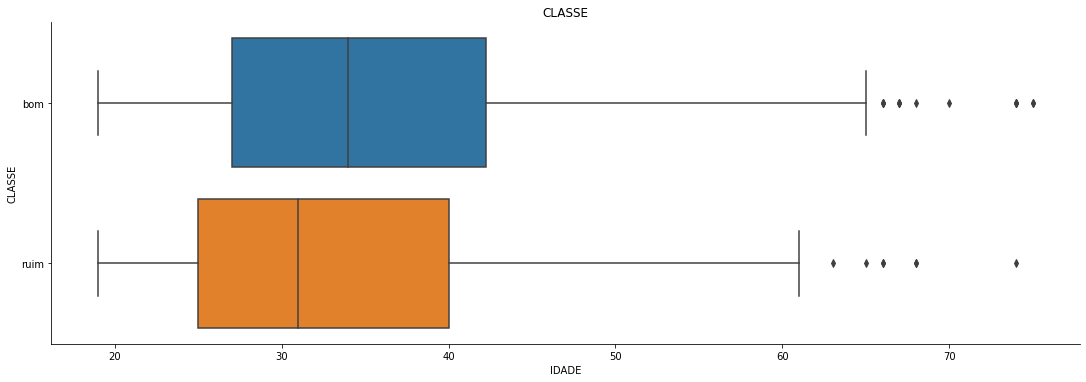

In [17]:
# Boxplots para Comparar Target Numérico e Variáveis Categóricas

def plot_num_target_cat_cols(df, target, cat_cols):
    for col in cat_cols:
        sns.catplot(data=df, x=target, y=col, kind="box", height=5, aspect=3)
        plt.title(f"{col}")
        #plt.xlabel("Frequência")
        plt.show()
        
plot_num_target_cat_cols(df, target_num, df.select_dtypes("object").columns)

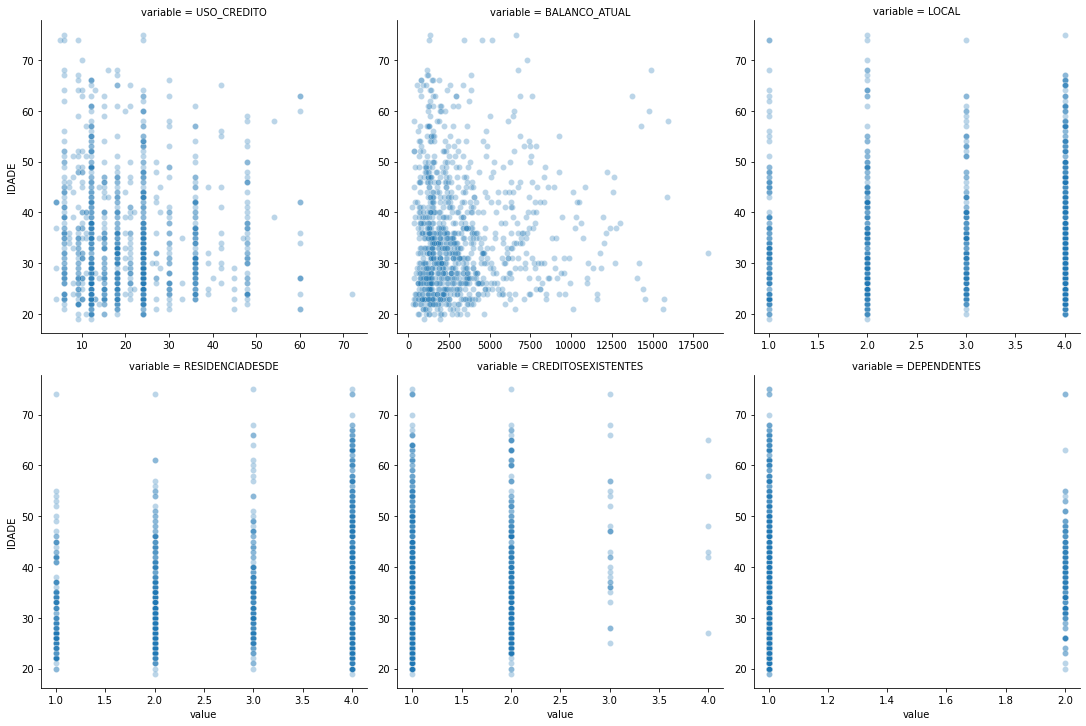

In [22]:
# Gráficos de Dispersão para Comparar Target Numérico e Variáveis Numéricas

df_melt_num = df.melt(id_vars=[chave_id, target_num], value_vars=df.drop(target_num, axis=1).select_dtypes(["float64", "int64"]))
sns.relplot(data=df_melt_num, x="value", y=target_num, kind="scatter", col="variable", col_wrap=3, alpha=0.3,
            facet_kws={"sharey": False, "sharex":False}) 
plt.show()

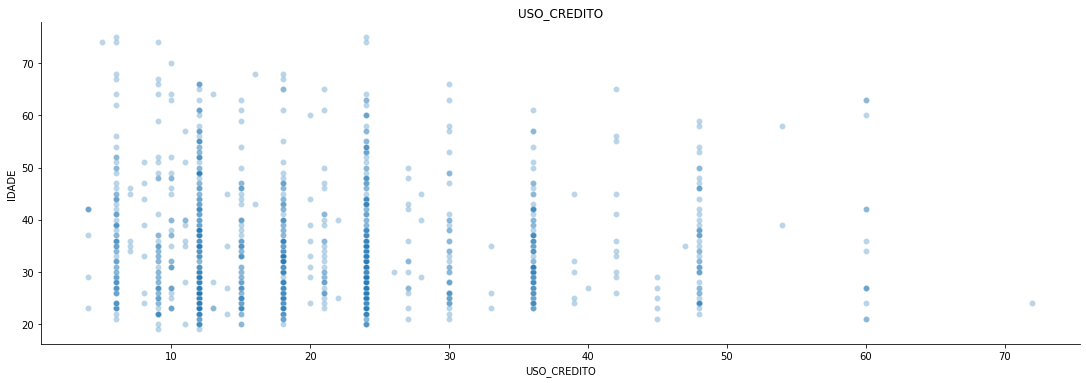

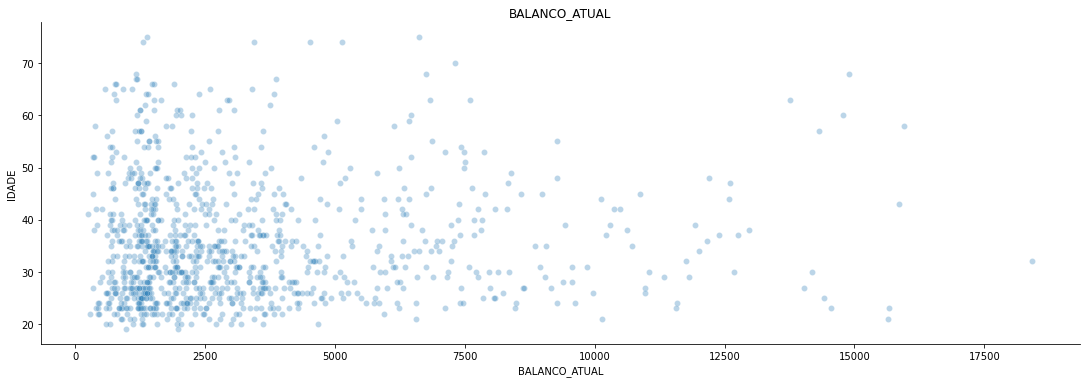

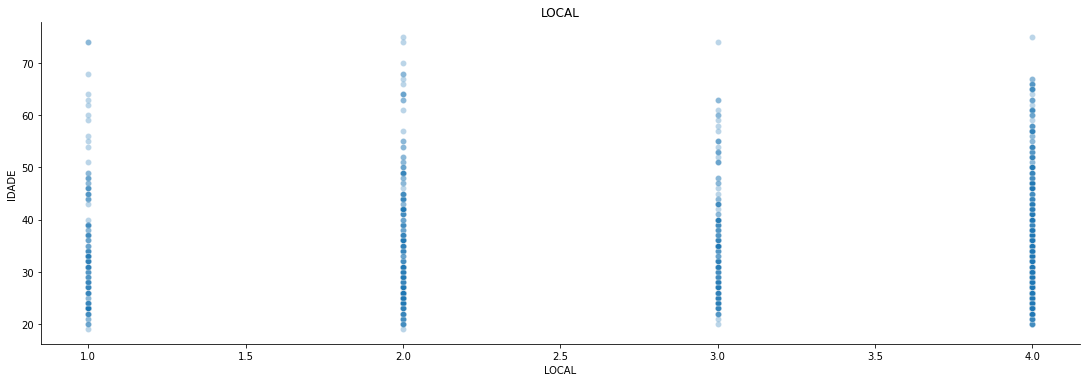

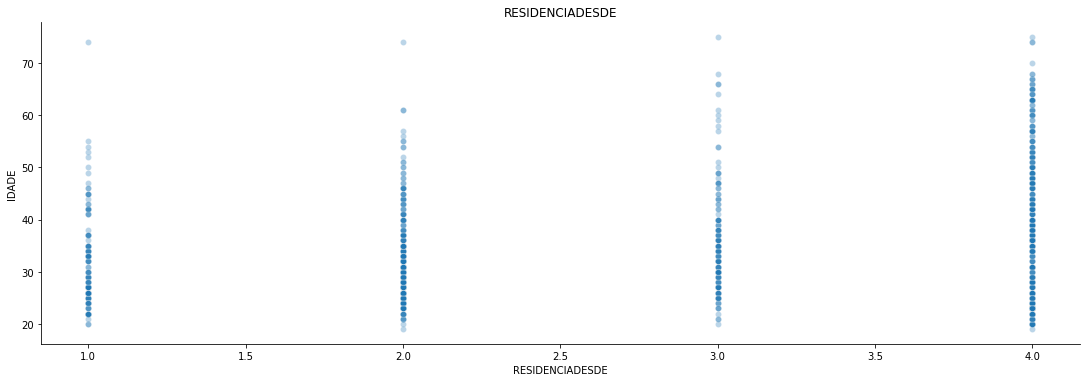

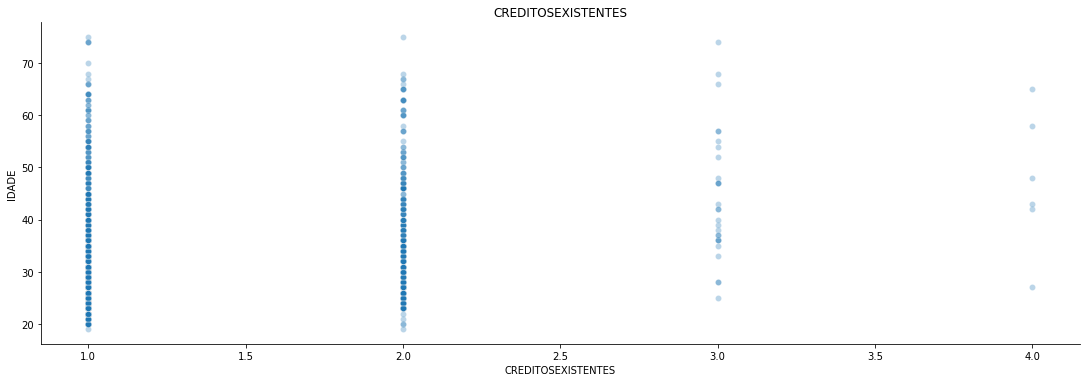

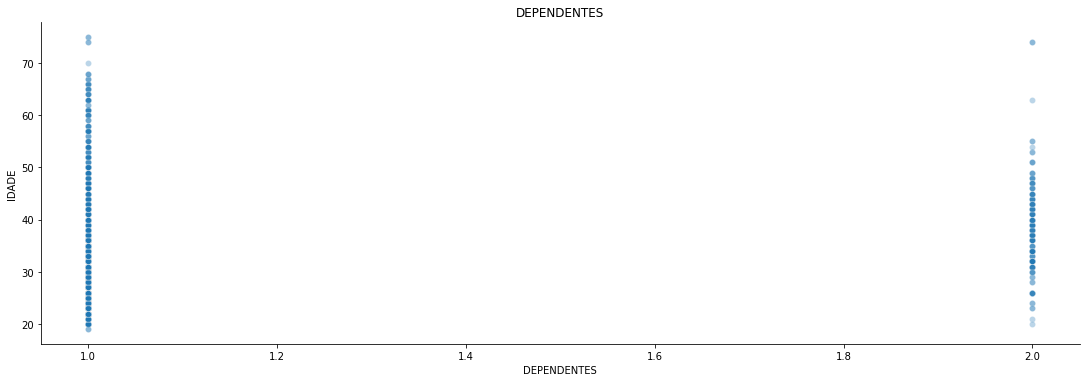

In [31]:
# Gráficos de Dispersão para Comparar Target Numérico e Variáveis Numéricas - Versão 2

def plot_num_target_num_cols(df, target, num_cols):
    for col in num_cols:
        #plt.figure(figsize=(15,5))
        sns.relplot(data=df, x=col, y=target, height=5, aspect=3, alpha=0.3)
        plt.title(f"{col}")
        plt.show()
        
plot_num_target_num_cols(df, target_num, df.drop(target_num, axis=1).select_dtypes(["float64", "int64"]).columns)

<AxesSubplot:>

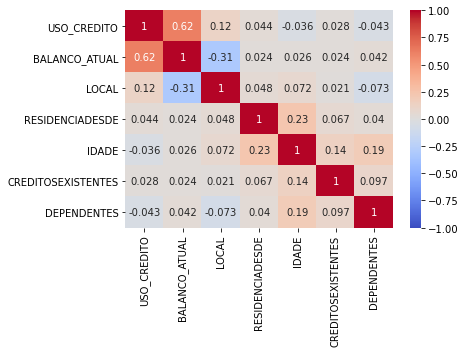

In [27]:
# Matriz de Correlação para Comparar Target Numérico e Variáveis Numéricas

sns.heatmap(df.select_dtypes(["float64", "int64"]).corr(method="spearman"), 
            vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
# Ainda quero que fique triangular aqui

<Figure size 1080x360 with 0 Axes>

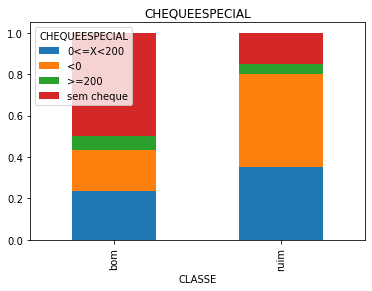

<Figure size 1080x360 with 0 Axes>

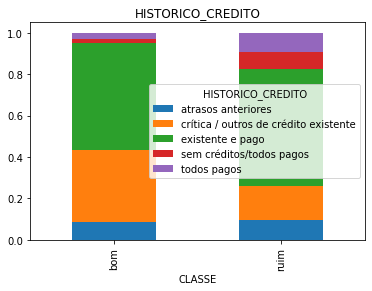

<Figure size 1080x360 with 0 Axes>

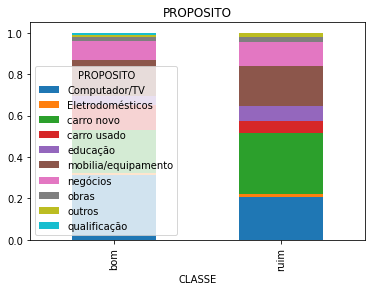

<Figure size 1080x360 with 0 Axes>

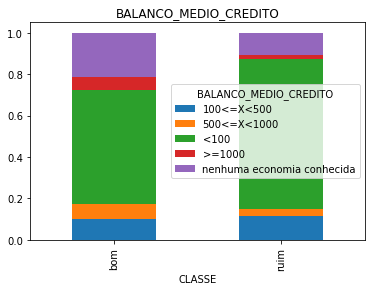

<Figure size 1080x360 with 0 Axes>

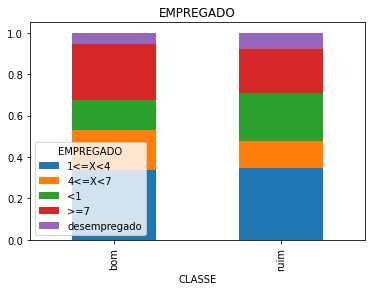

<Figure size 1080x360 with 0 Axes>

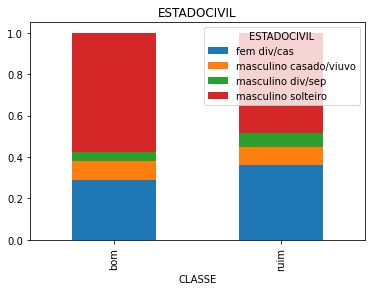

<Figure size 1080x360 with 0 Axes>

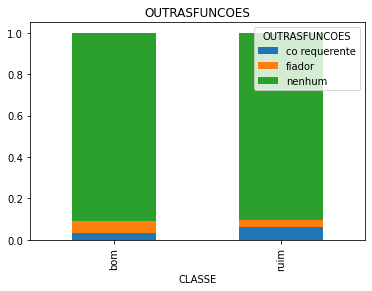

<Figure size 1080x360 with 0 Axes>

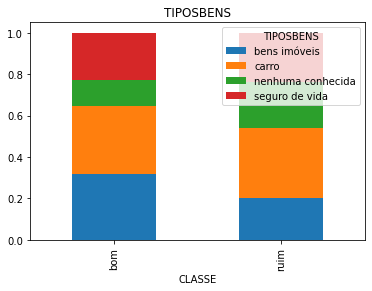

<Figure size 1080x360 with 0 Axes>

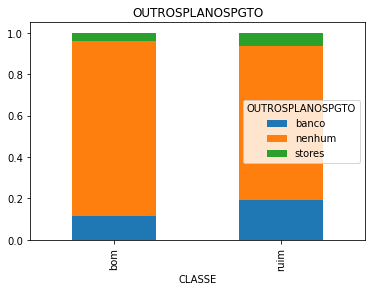

<Figure size 1080x360 with 0 Axes>

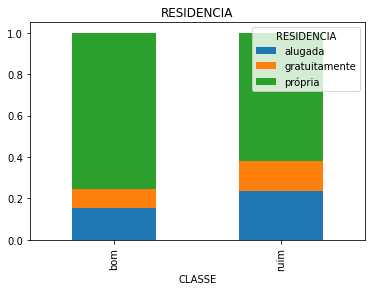

<Figure size 1080x360 with 0 Axes>

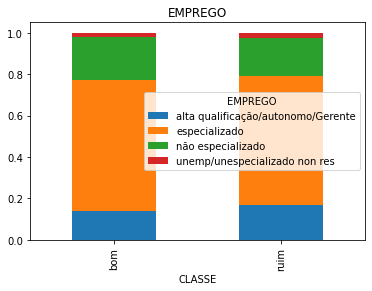

<Figure size 1080x360 with 0 Axes>

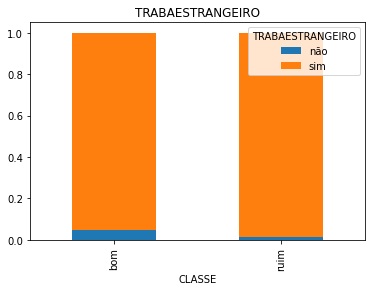

In [25]:
# Esse aqui dá para melhorar muito girando e mudando o tamanho

def plot_cat_target_cat_cols(df, target, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(15,5))
        pd.crosstab(index=df[target], columns=df[col], normalize = "index").plot.bar(stacked=True)
        plt.title(f"{col}")
        plt.show()
        
plot_cat_target_cat_cols(df, target_cat, df.drop(target_cat, axis=1).select_dtypes("object"))

<AxesSubplot:xlabel='value,variable'>

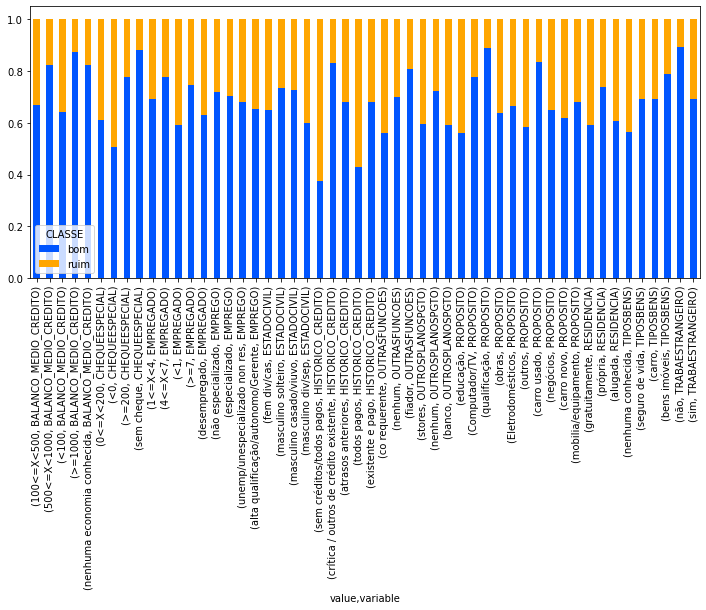

In [38]:
# Gráfico de Barras Empilhadas para Target Categórico e Variáveis Categóricas
# Ai, nessa versão eu teria que levar um tempo até analisar certinho separando pelas variáveis...

df_melt_cat = df.melt(id_vars=[chave_id, target_cat], value_vars=df.drop(target_cat, axis=1).select_dtypes("object"))
#df_melt_cat = df_melt_cat.set_index("variable")
cross_tab_prop = pd.crosstab(columns=df_melt_cat[target_cat],
                             index=[df_melt_cat["value"], df_melt_cat["variable"]],
                             normalize="index").sort_values("variable")
cross_tab_prop.plot(kind="bar", stacked=True, figsize=(12, 5), color=["#0055FF", "#FFA600"])

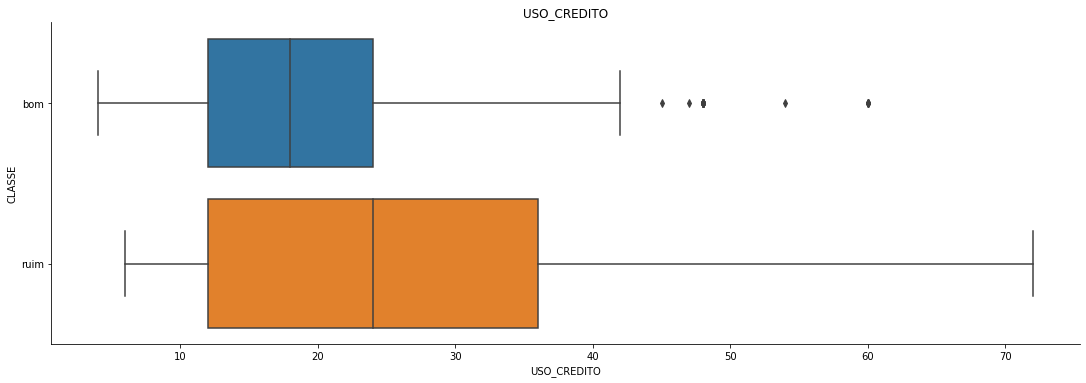

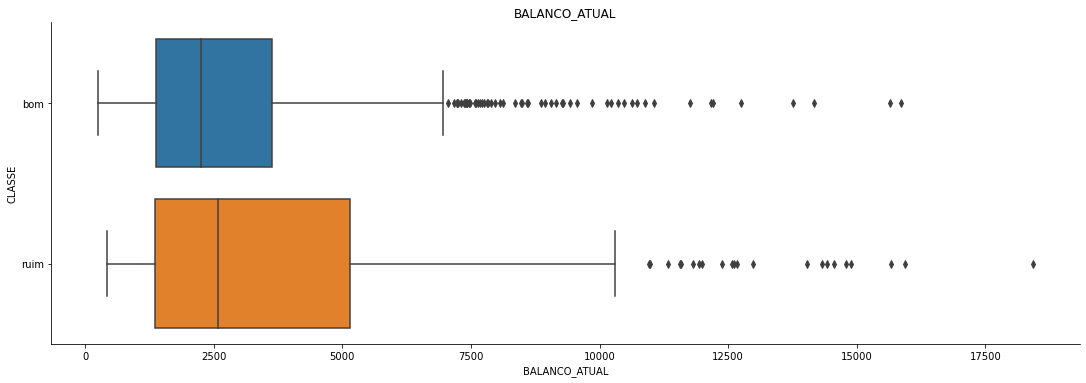

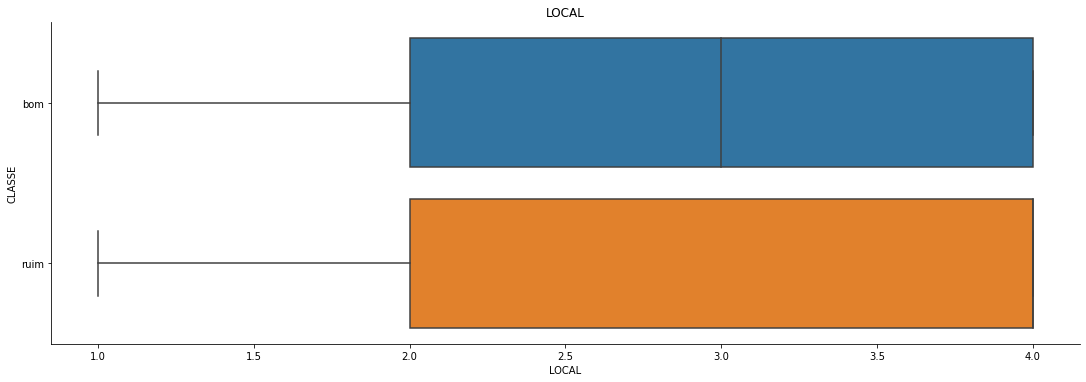

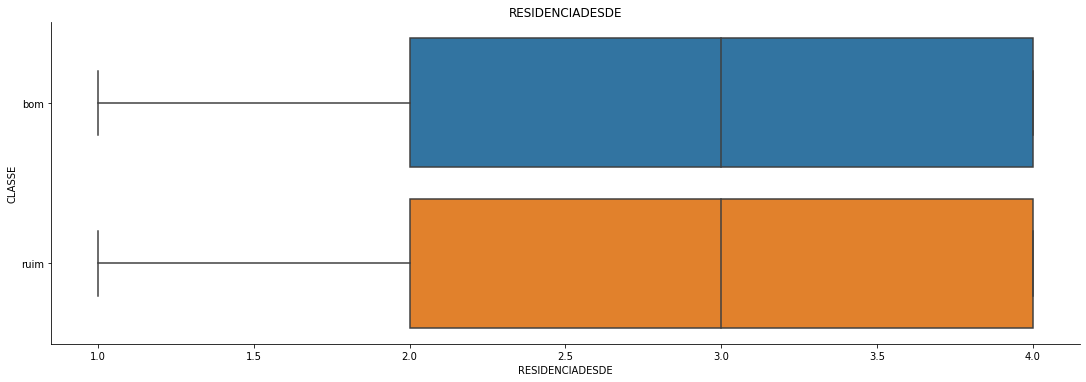

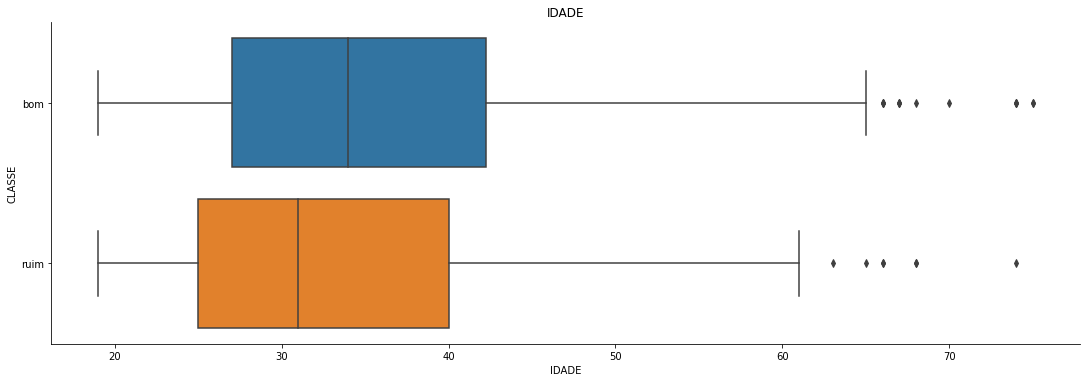

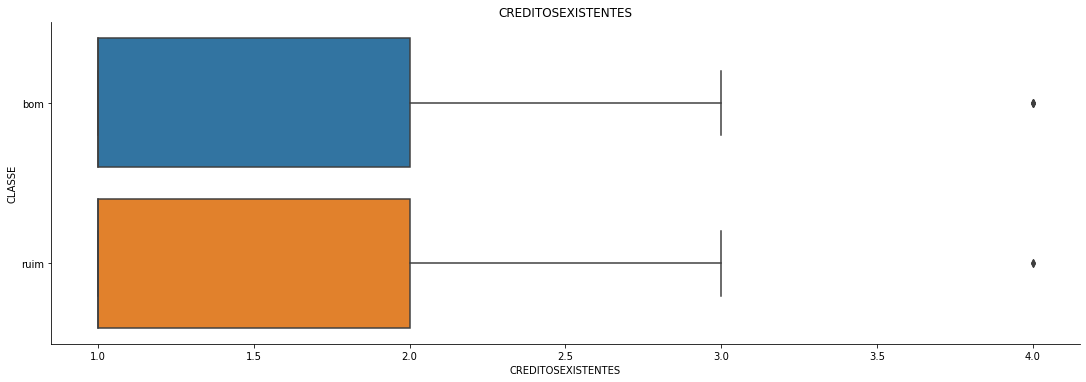

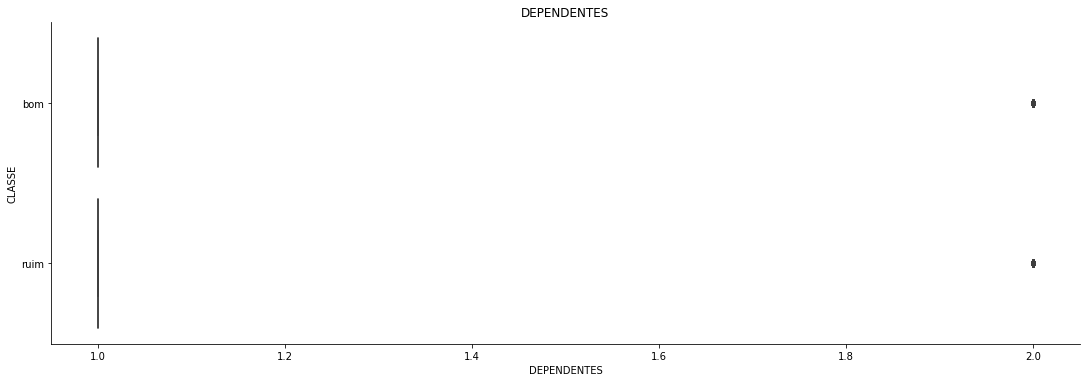

In [26]:
# Boxplots para Comparar Target Categórico e Variáveis Numéricas

def plot_cat_target_num_cols(df, target, num_cols):
    for col in num_cols:
        sns.catplot(data=df, x=col, y=target, kind="box", height=5, aspect=3)
        plt.title(f"{col}")
        #plt.xlabel("Frequência")
        plt.show()
        
plot_cat_target_num_cols(df, target_cat, df.select_dtypes(["float64", "int64"]).columns)

<AxesSubplot:xlabel='date'>

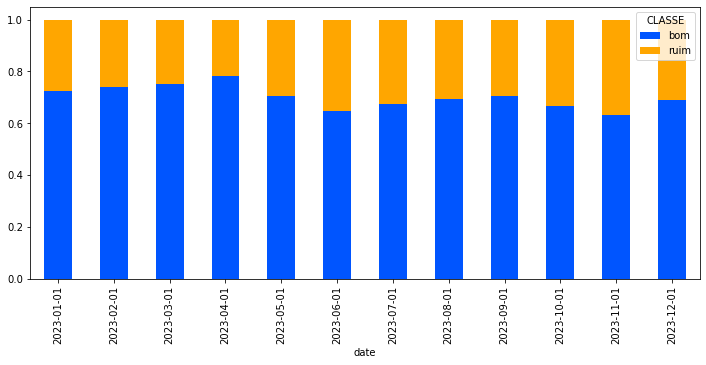

In [13]:
# Comportamento das Variáveis pelo tempo

#df_melt_cat = df.melt(id_vars=[chave_id, target_cat], value_vars=df.drop(target_cat, axis=1).select_dtypes("object"))
#df_melt_cat = df_melt_cat.set_index("variable")
cross_tab_prop = pd.crosstab(columns=df[target_cat],
                             index=df[target_date],
                             normalize="index")
cross_tab_prop.plot(kind="bar", stacked=True, figsize=(12, 5), color=["#0055FF", "#FFA600"])

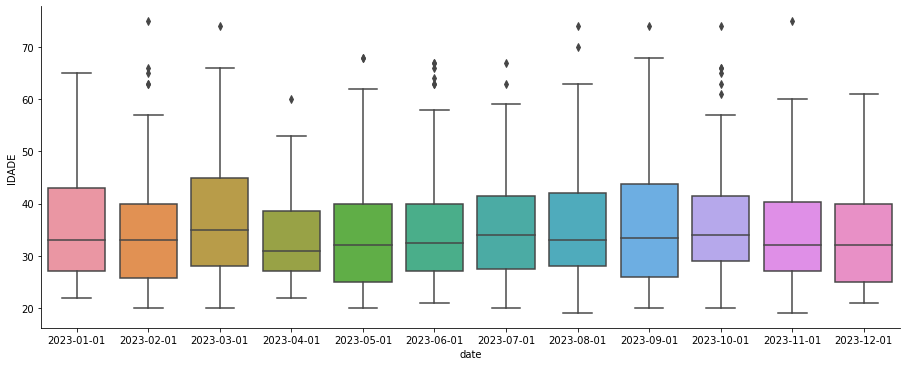

In [18]:
sns.catplot(data = df.sort_values(target_date), x=target_date, y=target_num, kind="box", height=5, aspect=2.5)

# Análises utilizando Pyspark